In [8]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

words = ["running", "runs", "runner", "better", "cats", "studies", "wolves", "was", "geese"]

# Example 1: Lemmatize without POS (default noun)
print([lemmatizer.lemmatize(word) for word in words])

['running', 'run', 'runner', 'better', 'cat', 'study', 'wolf', 'wa', 'goose']


In [9]:
# Example 2: Lemmatize as verb
print([lemmatizer.lemmatize(word, pos='v') for word in words])

['run', 'run', 'runner', 'better', 'cat', 'study', 'wolves', 'be', 'geese']


In [10]:
# Example 5: Lemmatize plural nouns
print(lemmatizer.lemmatize("wolves"))
print(lemmatizer.lemmatize("geese"))

wolf
goose


In [11]:
# Example 6: Lemmatize with context (sentence)
sentence = ["The", "cats", "are", "running", "fast"]
print([lemmatizer.lemmatize(word, pos='v') if word in ["running", "are"] else lemmatizer.lemmatize(word) for word in sentence])

['The', 'cat', 'be', 'run', 'fast']


In [12]:
# Example 8: Lemmatize adjectives
print(lemmatizer.lemmatize("faster", pos='a'))
print(lemmatizer.lemmatize("fastest", pos='a'))

fast
fast


In [13]:
# Example 9: Lemmatize words with suffixes
print(lemmatizer.lemmatize("happiness", pos='n'))

happiness


In [14]:
# Example 10: Lemmatize compound words (no change)
print(lemmatizer.lemmatize("multiuser"))

multiuser


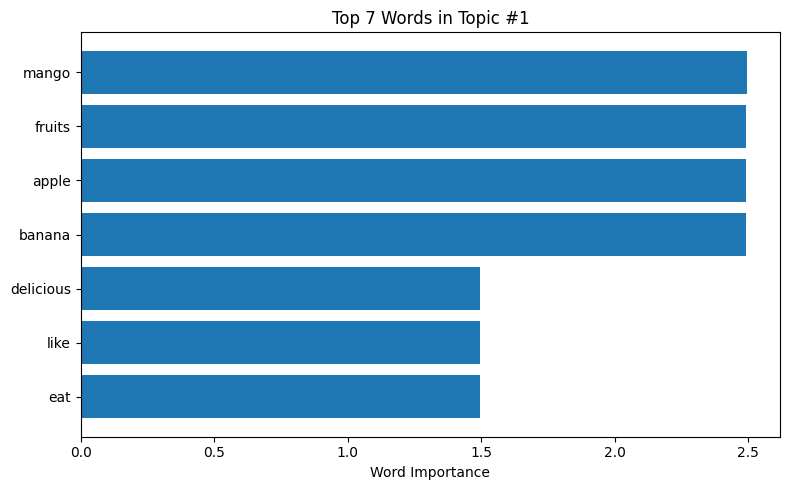

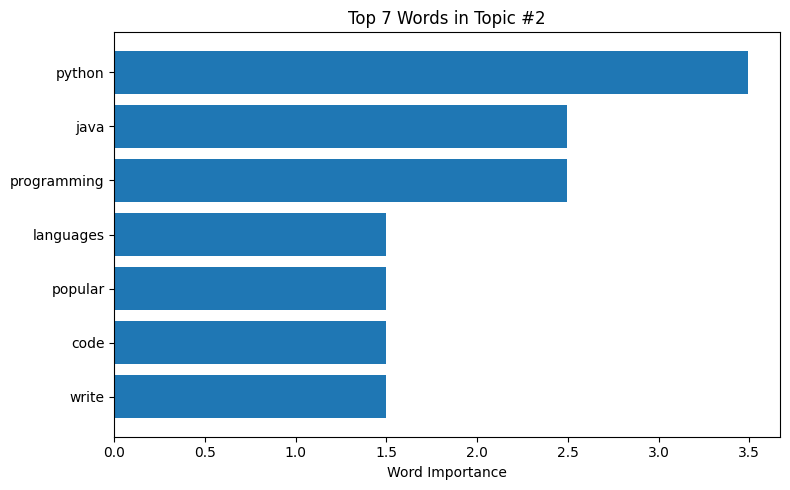

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus
documents = [
    "Apple and banana are fruits.",
    "I love to eat banana and mango.",
    "Fruits like apple and mango are delicious.",
    "Python and Java are popular programming languages.",
    "I write code in Python and sometimes in Java.",
    "Programming with Python is fun."
]

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(documents)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(dtm)

# Plot top words per topic
def plot_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_indices]
        top_weights = topic[top_features_indices]

        plt.figure(figsize=(8, 5))
        plt.barh(top_features[::-1], top_weights[::-1])
        plt.xlabel("Word Importance")
        plt.title(f"Top {n_top_words} Words in Topic #{topic_idx + 1}")
        plt.tight_layout()
        plt.show()

# Get feature (vocabulary) names
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names, n_top_words=7)


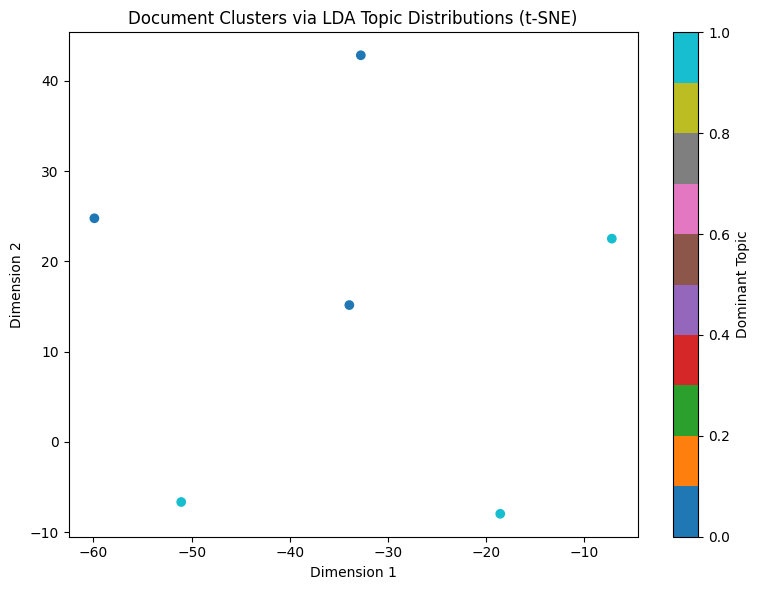

In [19]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Topic distributions from the LDA model
topic_distributions = lda.transform(dtm)  # shape: (n_documents, n_topics)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, max_iter=1000)
tsne_results = tsne.fit_transform(topic_distributions)

# Dominant topic per document
dominant_topic = np.argmax(topic_distributions, axis=1)

# Plot the 2D t-SNE projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dominant_topic, cmap='tab10')
plt.colorbar(scatter, label='Dominant Topic')
plt.title("Document Clusters via LDA Topic Distributions (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()
